In [26]:
import pandas as pd

# URL do CSV publicado no Google Sheets
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"

# Ler os dados no Pandas
df = pd.read_csv(csv_url)

# Salvar localmente no Colab para posterior upload
df.to_csv("magazine_capivara.csv", index=False)

print("Arquivo CSV baixado com sucesso!")

Arquivo CSV baixado com sucesso!


In [27]:
from google.colab import auth
auth.authenticate_user()

!gcloud auth application-default login


You are running on a Google Compute Engine virtual machine.
The service credentials associated with this virtual machine
will automatically be used by Application Default
Credentials, so it is not necessary to use this command.

If you decide to proceed anyway, your user credentials may be visible
to others with access to this virtual machine. Are you sure you want
to authenticate with your personal account?

Do you want to continue (Y/n)?  y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=Z5l6nvoXQ5jMSb5dfeJ17tux0ohJ46&prompt=consent&token_

In [28]:
!gcloud config set project magazine-capivara-dados

Updated property [core/project].


In [29]:
from google.cloud import storage

# Nome do novo bucket no GCP
bucket_name = "magazine-capivara-bucket4"

# Criar cliente do Storage
client = storage.Client()

# Referenciar o bucket atualizado
bucket = client.get_bucket(bucket_name)

# Nome do arquivo no bucket
blob = bucket.blob("magazine_capivara.csv")

# Fazer o upload
blob.upload_from_filename("magazine_capivara.csv")

print("Arquivo enviado para o Cloud Storage com sucesso!")

Arquivo enviado para o Cloud Storage com sucesso!


In [30]:
# Nome do novo bucket
bucket_name = "magazine-capivara-bucket4"

# Baixar arquivo do Cloud Storage
blob = bucket.blob("magazine_capivara.csv")
blob.download_to_filename("magazine_capivara_novo.csv")

# Carregar no Pandas
df_novo = pd.read_csv("magazine_capivara_novo.csv")
df_novo.head()

,Data,Receita,Custo,Lucro,Quantidade de Vendas,Novos Clientes,Categoria do Produto,Satisfação do Cliente,Região
0,2023-01-01,19352,6031,13321,76,8,Roupas,1,Oeste
1,2023-01-01,47585,29758,17827,7,13,Móveis,1,Leste
2,2023-01-02,36867,10699,26168,29,12,Eletrônicos,5,Sul
3,2023-01-02,30334,5471,24863,11,24,Brinquedos,5,Norte
4,2023-01-03,8644,4939,3705,33,1,Móveis,3,Norte


In [31]:
# Mostrar as primeiras 5 linhas do DataFrame
df.head()

,Data,Receita,Custo,Lucro,Quantidade de Vendas,Novos Clientes,Categoria do Produto,Satisfação do Cliente,Região
0,2023-01-01,19352,6031,13321,76,8,Roupas,1,Oeste
1,2023-01-01,47585,29758,17827,7,13,Móveis,1,Leste
2,2023-01-02,36867,10699,26168,29,12,Eletrônicos,5,Sul
3,2023-01-02,30334,5471,24863,11,24,Brinquedos,5,Norte
4,2023-01-03,8644,4939,3705,33,1,Móveis,3,Norte


In [32]:
df.shape  # Retorna (número de linhas, número de colunas)

(600, 9)

In [33]:
print(df.columns)  # Exibe todas as colunas disponíveis

Index(['Data', 'Receita', 'Custo', 'Lucro', 'Quantidade de Vendas',
       'Novos Clientes', 'Categoria do Produto', 'Satisfação do Cliente',
       'Região'],
      dtype='object')


In [34]:
df.columns = df.columns.str.strip()  # Remove espaços extras
df.columns = df.columns.str.lower()  # Converte para letras minúsculas
df.columns = df.columns.str.replace(" ", "_")  # Substitui espaços por underscores

In [35]:
print(df.columns)

Index(['data', 'receita', 'custo', 'lucro', 'quantidade_de_vendas',
       'novos_clientes', 'categoria_do_produto', 'satisfação_do_cliente',
       'região'],
      dtype='object')


In [36]:
df.isnull().sum()

,0
data,0
receita,0
custo,0
lucro,0
quantidade_de_vendas,0
novos_clientes,0
categoria_do_produto,0
satisfação_do_cliente,0
região,0


In [37]:
print(df.columns)

Index(['data', 'receita', 'custo', 'lucro', 'quantidade_de_vendas',
       'novos_clientes', 'categoria_do_produto', 'satisfação_do_cliente',
       'região'],
      dtype='object')


In [38]:
df.columns = df.columns.str.strip()  # Remove espaços extras
df.columns = df.columns.str.lower()  # Converte para letras minúsculas
df.columns = df.columns.str.replace(" ", "_")  # Substitui espaços por underscores

print(df.columns)  # Mostrar os novos nomes

Index(['data', 'receita', 'custo', 'lucro', 'quantidade_de_vendas',
       'novos_clientes', 'categoria_do_produto', 'satisfação_do_cliente',
       'região'],
      dtype='object')


In [39]:
# Agrupar os produtos e somar a quantidade vendida
top_produtos = df.groupby('categoria_do_produto')['quantidade_de_vendas'].sum().sort_values(ascending=False)

# Exibir os 10 produtos mais vendidos
top_produtos.head(10)

,quantidade_de_vendas
categoria_do_produto,
Alimentos,6261
Eletrônicos,6253
Brinquedos,6182
Móveis,5948
Roupas,4690


In [41]:
# Reimportar as bibliotecas (caso tenha perdido a sessão)
import pandas as pd
import matplotlib.pyplot as plt

# Recarregar os dados
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar os nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Agrupar por categoria do produto e somar a quantidade de vendas
top_categorias = df.groupby('categoria_do_produto')['quantidade_de_vendas'].sum().sort_values(ascending=False)

# Verificar os dados
print(top_categorias.head())

categoria_do_produto
Alimentos      6261
Eletrônicos    6253
Brinquedos     6182
Móveis         5948
Roupas         4690
Name: quantidade_de_vendas, dtype: int64


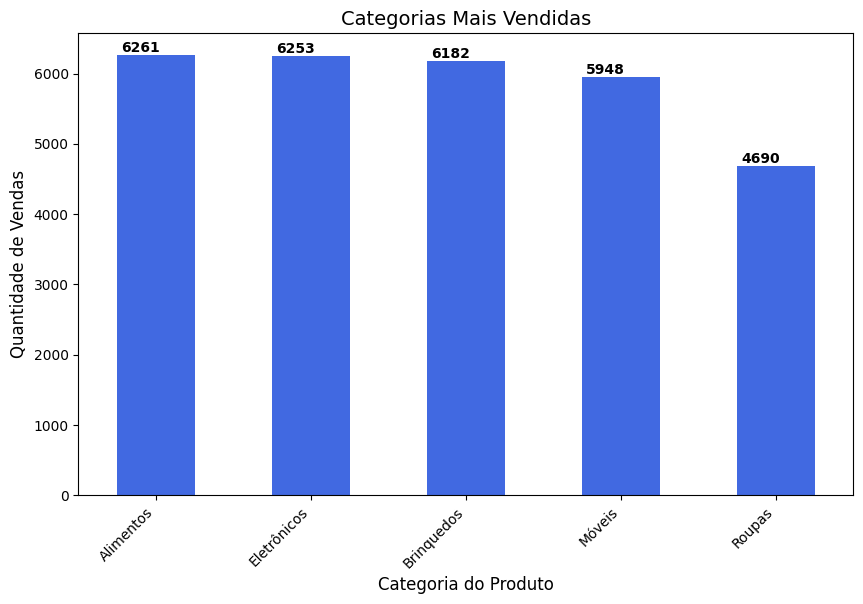

In [42]:
# Criar figura
plt.figure(figsize=(10, 6))
bars = top_categorias.plot(kind='bar', color='royalblue')

# Adicionar os valores dentro de cada barra
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1,
             bar.get_height() + 2,
             int(bar.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adicionar título e rótulos
plt.title("Categorias Mais Vendidas", fontsize=14)
plt.xlabel("Categoria do Produto", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Salvar o gráfico como imagem no Colab
plt.savefig("categorias_mais_vendidas.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [43]:
# Converter a coluna 'data' para o formato de data
df['data'] = pd.to_datetime(df['data'])

# Verificar se a conversão deu certo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data                   600 non-null    datetime64[ns]
 1   receita                600 non-null    int64         
 2   custo                  600 non-null    int64         
 3   lucro                  600 non-null    int64         
 4   quantidade_de_vendas   600 non-null    int64         
 5   novos_clientes         600 non-null    int64         
 6   categoria_do_produto   600 non-null    object        
 7   satisfação_do_cliente  600 non-null    int64         
 8   região                 600 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 42.3+ KB


In [44]:
# Definir a coluna 'data' como índice
df.set_index('data', inplace=True)

# Agrupar por mês somando a quantidade de vendas
vendas_mensais = df['quantidade_de_vendas'].resample('M').sum()

# Exibir os primeiros meses para conferir
vendas_mensais.head()

<ipython-input-44-e19b22f8bbf2>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_mensais = df['quantidade_de_vendas'].resample('M').sum()


,quantidade_de_vendas
data,
2023-01-31,2523
2023-02-28,2070
2023-03-31,2771
2023-04-30,2296
2023-05-31,2687


<ipython-input-45-e160a0cc160f>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_mensais = df['quantidade_de_vendas'].resample('M').sum()


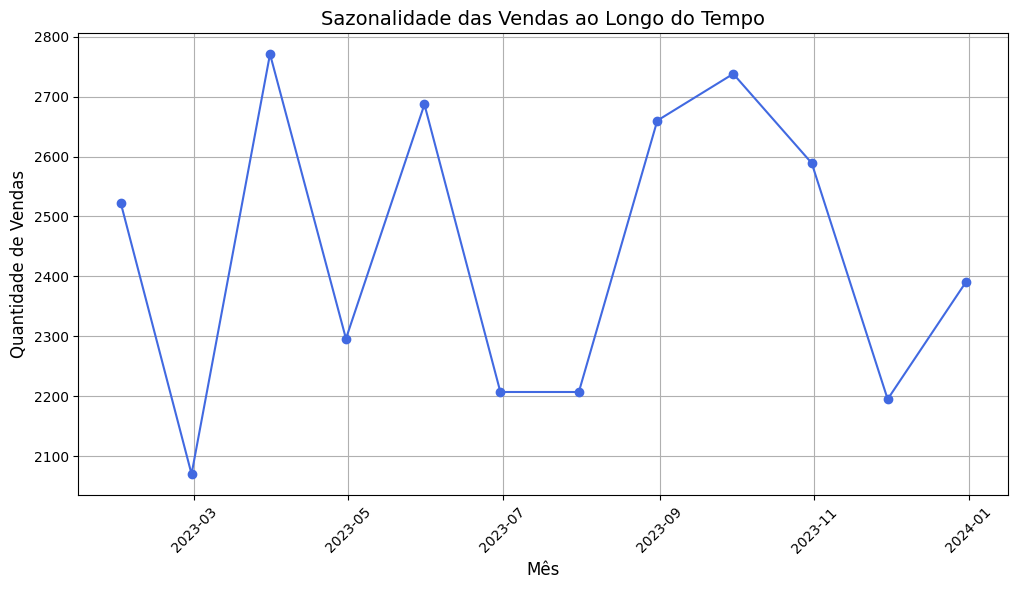

In [45]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar nomes das colunas para evitar erros
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Converter a coluna 'data' para o formato de data
df['data'] = pd.to_datetime(df['data'])

# Definir 'data' como índice para facilitar análise temporal
df.set_index('data', inplace=True)

# Agrupar as vendas por mês (soma das vendas mensais)
vendas_mensais = df['quantidade_de_vendas'].resample('M').sum()

# Criar gráfico de sazonalidade das vendas
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o', linestyle='-', color='royalblue')

# Adicionar título e rótulos
plt.title("Sazonalidade das Vendas ao Longo do Tempo", fontsize=14)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=45)

# Salvar o gráfico como imagem no Colab
plt.savefig("sazonalidade_vendas.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.grid(True)
plt.show()

In [46]:
# Agrupar por região e somar a quantidade de vendas
vendas_por_regiao = df.groupby('região')['quantidade_de_vendas'].sum().sort_values(ascending=False)

# Exibir os dados para conferência
print(vendas_por_regiao)

região
Norte    8324
Leste    7342
Oeste    7311
Sul      6357
Name: quantidade_de_vendas, dtype: int64


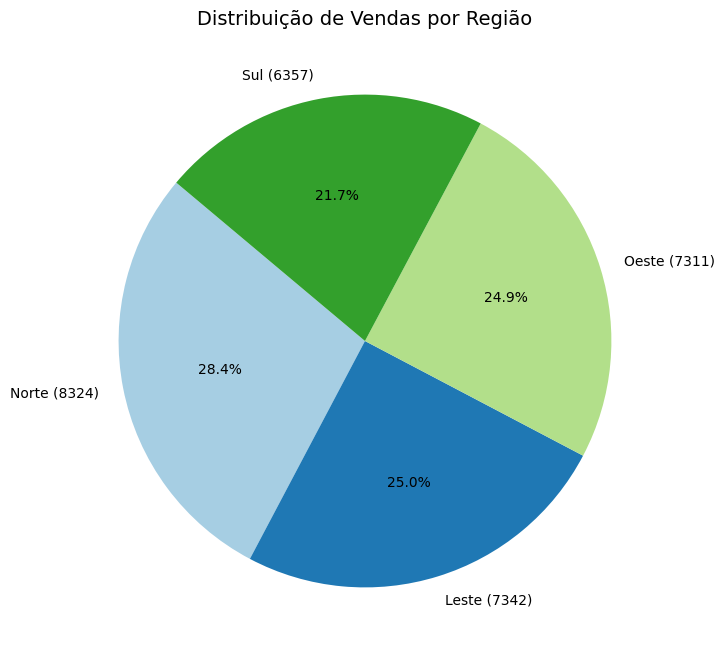

In [47]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar os nomes das colunas para evitar erros
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Agrupar por região e somar a quantidade de vendas
vendas_por_regiao = df.groupby('região')['quantidade_de_vendas'].sum().sort_values(ascending=False)

# Criar gráfico de pizza para visualizar as vendas por região
plt.figure(figsize=(8, 8))

# Criar rótulos com nome da região + quantidade de vendas
labels = [f"{reg} ({vendas_por_regiao[reg]})" for reg in vendas_por_regiao.index]

# Criar gráfico de pizza com porcentagem
plt.pie(vendas_por_regiao, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title("Distribuição de Vendas por Região", fontsize=14)

# Salvar o gráfico como imagem no Colab
plt.savefig("vendas_por_regiao_pizza.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [48]:
# Agrupar por categoria do produto e calcular a média de satisfação dos clientes
satisfacao_por_categoria = df.groupby('categoria_do_produto')['satisfação_do_cliente'].mean().sort_values(ascending=False)

# Exibir os dados para conferência
print(satisfacao_por_categoria)

categoria_do_produto
Móveis         3.094017
Alimentos      3.073171
Eletrônicos    3.040323
Roupas         3.038462
Brinquedos     3.007576
Name: satisfação_do_cliente, dtype: float64


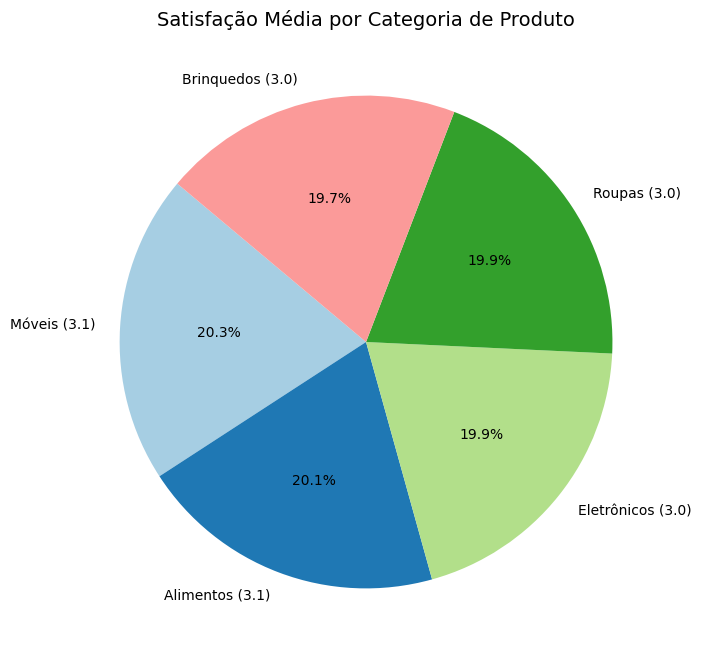

In [49]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar os nomes das colunas para evitar erros
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Agrupar por categoria de produto e calcular a média de satisfação dos clientes
satisfacao_por_categoria = df.groupby('categoria_do_produto')['satisfação_do_cliente'].mean().sort_values(ascending=False)

# Criar gráfico de pizza para visualizar a satisfação média por categoria de produto
plt.figure(figsize=(8, 8))

# Criar rótulos com nome da categoria + média de satisfação
labels = [f"{cat} ({satisfacao_por_categoria[cat]:.1f})" for cat in satisfacao_por_categoria.index]

# Criar gráfico de pizza com porcentagem
plt.pie(satisfacao_por_categoria, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Adicionar título
plt.title("Satisfação Média por Categoria de Produto", fontsize=14)

# Salvar o gráfico como imagem no Colab
plt.savefig("satisfacao_por_categoria_pizza.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

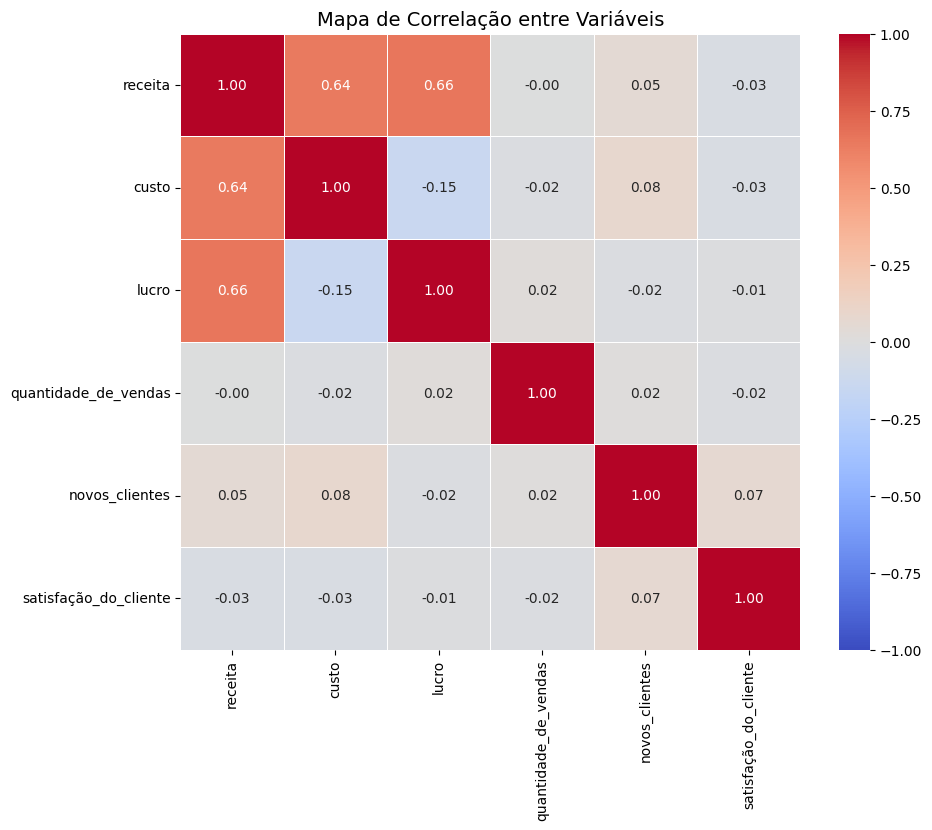

In [50]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar os nomes das colunas para evitar erros
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Calcular a matriz de correlação
correlacao = df.corr(numeric_only=True)

# Criar um heatmap para visualizar as correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Adicionar título
plt.title("Mapa de Correlação entre Variáveis", fontsize=14)

# Salvar o gráfico como imagem no Colab
plt.savefig("mapa_correlacao.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

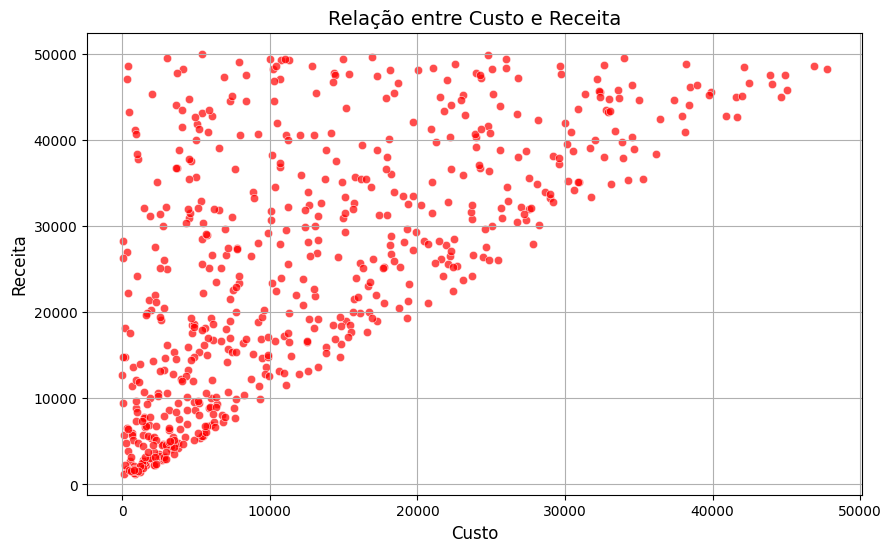

In [52]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar os nomes das colunas para evitar erros
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Criar gráfico de dispersão para mostrar a relação entre Custo e Receita
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['custo'], y=df['receita'], color="red", alpha=0.7)

# Adicionar título e rótulos
plt.title("Relação entre Custo e Receita", fontsize=14)
plt.xlabel("Custo", fontsize=12)
plt.ylabel("Receita", fontsize=12)
plt.grid(True)

# Salvar o gráfico como imagem no Colab
plt.savefig("relacao_custo_receita.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

	Possíveis Interpretações do Gráfico Custo x Receita
  
  •	Isso significa que quando os custos aumentam, a receita também aumenta proporcionalmente.
	•	Conclusão: A empresa consegue transformar custos em receita de forma eficiente.
	•	O que fazer?
Se a margem de lucro for boa, continuar investindo.
Avaliar se há oportunidades para escalar o negócio com investimentos estratégicos.


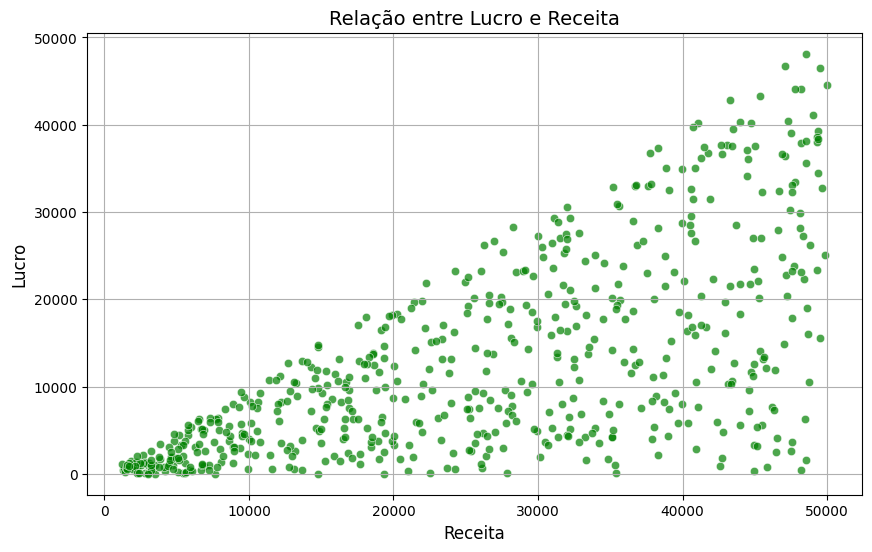

In [53]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar os nomes das colunas para evitar erros
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Criar gráfico de dispersão para mostrar a relação entre Lucro e Receita
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['receita'], y=df['lucro'], color="green", alpha=0.7)

# Adicionar título e rótulos
plt.title("Relação entre Lucro e Receita", fontsize=14)
plt.xlabel("Receita", fontsize=12)
plt.ylabel("Lucro", fontsize=12)
plt.grid(True)

# Salvar o gráfico como imagem no Colab
plt.savefig("relacao_lucro_receita.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

Possíveis Interpretações

	•	Isso significa que quando a receita aumenta, o lucro também aumenta proporcionalmente.
	•	Conclusão: O modelo de negócio da Magazine Capivara é saudável, pois mais vendas geram mais receita e, consequentemente, mais lucro.
	•	O que fazer? Focar em estratégias de crescimento, como:
	•	Aumentar o volume de vendas (promoções e campanhas de marketing).
	•	Expandir para novas regiões ou públicos.



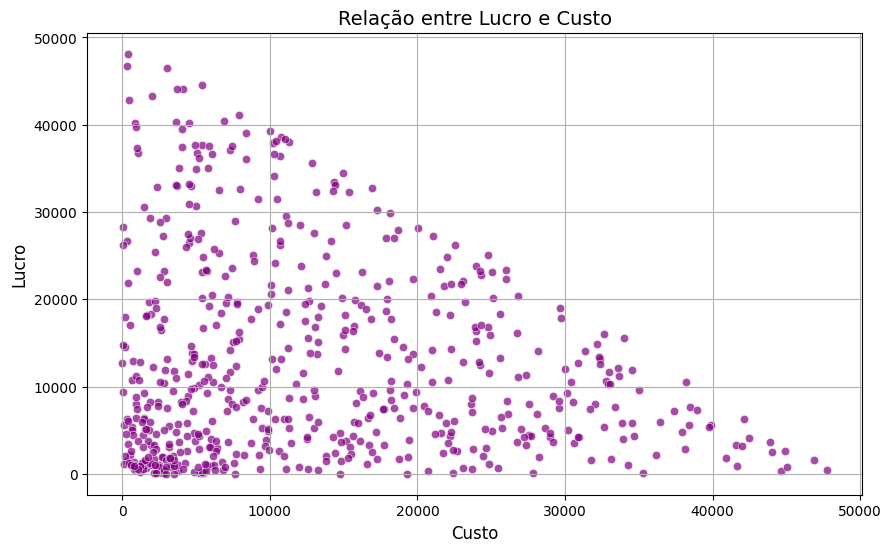

In [54]:
# Importar bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV
csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRhABWkUWLPMcWSofPBV355OalLI7CyHr77I-BXbSog_6_cHv2qLl2OFBs-B_DlVJpJauhvC5c78Zok/pub?gid=1202447174&single=true&output=csv"
df = pd.read_csv(csv_url)

# Padronizar os nomes das colunas para evitar erros
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Criar gráfico de dispersão para mostrar a relação entre Lucro e Custo
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['custo'], y=df['lucro'], color="purple", alpha=0.7)

# Adicionar título e rótulos
plt.title("Relação entre Lucro e Custo", fontsize=14)
plt.xlabel("Custo", fontsize=12)
plt.ylabel("Lucro", fontsize=12)
plt.grid(True)

# Salvar o gráfico como imagem no Colab
plt.savefig("relacao_lucro_custo.png", dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

Isso significa que quanto mais a empresa gasta, menor é o lucro.
	•	Conclusão: A empresa pode estar operando com custos muito altos, reduzindo sua margem de lucro.
	•	O que fazer?
Rever custos operacionais para cortar despesas desnecessárias.
Negociar com fornecedores para reduzir preços de matéria-prima.
Avaliar a precificação dos produtos para garantir margens saudáveis.